In [4]:
import networkx as nx
import pickle
import json
import numpy as np
import simpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.cm as cm
import pandas as pd

In [5]:
fin_new = open("C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/new_boundaries_0204/GENERATING_GML/second_round/etreeGML.json")
j_new = json.loads(fin_new.read())

In [6]:
with open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Documents/GitHub/HDSS_test/data/other data/nx_graph.pkl', 'rb') as f:
    G = pickle.load(f)

In [7]:

print(G.nodes(data=True))
egdes = G.edges()
print(len(egdes))
print(G.edges(data=True))

[(0, {'coords': [-8.052733, 30.98757, 0.0]}), (1, {'coords': [-33.151512, 31.68331, 0.0]}), (2, {'coords': [-40.878929, 24.653619, 4.57]}), (3, {'coords': [-36.12081, 11.009619, 0.0]}), (4, {'coords': [-20.182727, 35.317, 9.25]}), (5, {'coords': [-38.358625, 31.718344, 4.57]}), (6, {'coords': [-13.218816, 45.343605, 4.57]}), (7, {'coords': [-8.011654, 18.634846, 0.0]}), (8, {'coords': [-34.381143, 16.815643, 4.57]}), (9, {'coords': [-32.874889, 48.775556, 0.0]}), (10, {'coords': [-10.367429, 41.196086, 0.0]}), (11, {'coords': [-29.201833, 39.5815, 0.0]}), (12, {'coords': [-46.988, 49.9023, 0.0]}), (13, {'coords': [-2.754696, 20.201783, 0.0]}), (14, {'coords': [-18.58013, 16.250043, 0.0]}), (15, {'coords': [-8.870143, 14.058571, 4.57]}), (16, {'coords': [-7.718875, 23.449688, 4.57]}), (17, {'coords': [-33.65305, 4.5675, 0.0]}), (18, {'coords': [-16.913182, 33.221182, 4.57]}), (19, {'coords': [-38.923, 51.940632, 0.0]}), (20, {'coords': [-46.027696, 42.53887, 0.0]}), (21, {'coords': [-29

### Local Closensess Centrality

In [8]:
import networkx as nx

def local_closeness_centrality(G, radius=5):
    """
    Compute the local closeness centrality for each node in G.
    
    For each node, the local closeness centrality is calculated over the
    ego graph (i.e. the subgraph induced by all nodes within 'radius'
    hops of the node). The centrality of a node v in its ego graph is given by:
    
        C(v) = (n-1) / sum_{u in ego(v)} d(v, u)
    
    where n is the number of nodes in the ego graph and d(v,u) is the shortest path
    distance from v to u (in the ego graph). If the sum of distances is zero,
    the centrality is set to 0.
    
    Parameters:
        G (networkx.Graph): The input graph.
        radius (int): The radius to define the local neighborhood (default is 2).
        
    Returns:
        dict: A dictionary mapping each node to its local closeness centrality.
    """
    local_centrality = {}
    
    for node in G.nodes():
        # Extract the ego graph of 'node' (all nodes within 'radius' hops)
        ego = nx.ego_graph(G, node, radius=radius)
        
        # If there is more than one node in the ego graph, compute distances
        if len(ego) > 1:
            # Compute shortest path lengths from 'node' in the ego graph
            sp_lengths = nx.single_source_shortest_path_length(ego, node)
            # Sum of distances from 'node' to all other nodes in the ego graph
            total_distance = sum(sp_lengths.values())
            # Compute the local closeness centrality using the formula:
            # (n-1) / (sum of distances)
            local_centrality[node] = (len(ego) - 1) / total_distance if total_distance > 0 else 0.0
        else:
            # If the ego graph only contains the node itself, define its centrality as 0
            local_centrality[node] = 0.0

    return local_centrality


    
    # Compute the local closeness centrality for each node with a radius of 2
local_cc = local_closeness_centrality(G, radius=5)

# Print the results
for node, cc in local_cc.items():
    print(f"Node {node}: Local Closeness Centrality = {cc:.4f}")


Node 0: Local Closeness Centrality = 0.2987
Node 1: Local Closeness Centrality = 0.3556
Node 2: Local Closeness Centrality = 0.2812
Node 3: Local Closeness Centrality = 0.3898
Node 4: Local Closeness Centrality = 0.0000
Node 5: Local Closeness Centrality = 0.2632
Node 6: Local Closeness Centrality = 0.3261
Node 7: Local Closeness Centrality = 0.3500
Node 8: Local Closeness Centrality = 0.3554
Node 9: Local Closeness Centrality = 0.3881
Node 10: Local Closeness Centrality = 0.3188
Node 11: Local Closeness Centrality = 0.5676
Node 12: Local Closeness Centrality = 0.3750
Node 13: Local Closeness Centrality = 0.3455
Node 14: Local Closeness Centrality = 0.3267
Node 15: Local Closeness Centrality = 0.4024
Node 16: Local Closeness Centrality = 0.4342
Node 17: Local Closeness Centrality = 0.6667
Node 18: Local Closeness Centrality = 0.3214
Node 19: Local Closeness Centrality = 0.3472
Node 20: Local Closeness Centrality = 0.2569
Node 21: Local Closeness Centrality = 0.3372
Node 22: Local Close

### Local Eigenvector Centrality

In [9]:
import networkx as nx

def local_eigenvector_centrality(G, radius=5, max_iter=1000, tol=1e-06):
    """
    Compute the local eigenvector centrality for each node in graph G.
    
    For each node, this function:
      1. Extracts the ego graph (nodes within 'radius' hops).
      2. Computes eigenvector centrality on the ego graph.
      3. Assigns the eigenvector centrality value of the node within its ego graph
         as its local eigenvector centrality.
         
    Parameters:
        G (networkx.Graph): The input graph.
        radius (int): The radius to define the local neighborhood (default=2).
        max_iter (int): Maximum number of iterations for eigenvector centrality.
        tol (float): Tolerance for convergence.
    
    Returns:
        dict: A dictionary mapping each node to its local eigenvector centrality.
    """
    local_eig = {}
    
    for node in G.nodes():
        # Create the ego graph for the current node
        ego = nx.ego_graph(G, node, radius=radius)
        
        # If the ego graph has more than one node, compute eigenvector centrality.
        if len(ego) > 1:
            try:
                # Compute eigenvector centrality on the ego graph
                eig_cent = nx.eigenvector_centrality(ego, max_iter=max_iter, tol=tol)
                # Record the centrality for the node itself
                local_eig[node] = eig_cent[node]
            except nx.NetworkXException as e:
                # In case of convergence issues, assign a default value
                print(f"Warning: Eigenvector centrality did not converge for node {node} in its ego graph.")
                local_eig[node] = 0.0
        else:
            # For an isolated node, assign a centrality value (could be 0 or 1 as a convention)
            local_eig[node] = 0.0
            
    return local_eig


    
# Compute local eigenvector centralities with a radius of 2
local_eig_cent = local_eigenvector_centrality(G, radius=5)

# Print the local eigenvector centrality for each node
for node, cent in local_eig_cent.items():
    print(f"Node {node}: Local Eigenvector Centrality = {cent:.4f}")


Node 0: Local Eigenvector Centrality = 0.0891
Node 1: Local Eigenvector Centrality = 0.6703
Node 2: Local Eigenvector Centrality = 0.1128
Node 3: Local Eigenvector Centrality = 0.6648
Node 4: Local Eigenvector Centrality = 0.0000
Node 5: Local Eigenvector Centrality = 0.0137
Node 6: Local Eigenvector Centrality = 0.1963
Node 7: Local Eigenvector Centrality = 0.6589
Node 8: Local Eigenvector Centrality = 0.6701
Node 9: Local Eigenvector Centrality = 0.5849
Node 10: Local Eigenvector Centrality = 0.1731
Node 11: Local Eigenvector Centrality = 0.6655
Node 12: Local Eigenvector Centrality = 0.6006
Node 13: Local Eigenvector Centrality = 0.1473
Node 14: Local Eigenvector Centrality = 0.1451
Node 15: Local Eigenvector Centrality = 0.6229
Node 16: Local Eigenvector Centrality = 0.6730
Node 17: Local Eigenvector Centrality = 0.6124
Node 18: Local Eigenvector Centrality = 0.2535
Node 19: Local Eigenvector Centrality = 0.2815
Node 20: Local Eigenvector Centrality = 0.0090
Node 21: Local Eigenvec

### Local Betweeness Centralities

In [10]:
import networkx as nx

def local_betweenness_centrality(G, radius=5, normalized=True, weight=None):
    """
    Compute the local betweenness centrality for each node in graph G.
    
    For each node:
      1. Extract the ego graph (all nodes within 'radius' hops).
      2. Compute betweenness centrality on the ego graph.
      3. Assign the betweenness centrality of the central node as its local betweenness centrality.
      
    Parameters:
        G (networkx.Graph): The input graph.
        radius (int): The radius to define the local neighborhood (default=2).
        normalized (bool): If True, betweenness values are normalized (default=True).
        weight (str): Edge data key to use as weight (default=None).
        
    Returns:
        dict: A dictionary mapping each node to its local betweenness centrality.
    """
    local_bc = {}
    
    for node in G.nodes():
        # Extract the ego graph centered at 'node'
        ego = nx.ego_graph(G, node, radius=radius)
        
        if len(ego) > 1:
            # Compute betweenness centrality for the nodes in the ego graph
            bc = nx.betweenness_centrality(ego, normalized=normalized, weight=weight)
            # The local betweenness centrality is the value for the central node in its ego graph
            local_bc[node] = bc[node]
        else:
            # For an isolated node (ego graph with one node), assign a centrality value of 0.
            local_bc[node] = 0.0
            
    return local_bc


    
# Compute local betweenness centrality for each node with a radius of 2
local_bc = local_betweenness_centrality(G, radius=5)

# Print the local betweenness centrality for each node
for node, bc_value in local_bc.items():
    print(f"Node {node}: Local Betweenness Centrality = {bc_value:.4f}")


Node 0: Local Betweenness Centrality = 0.4971
Node 1: Local Betweenness Centrality = 0.8799
Node 2: Local Betweenness Centrality = 0.0000
Node 3: Local Betweenness Centrality = 0.8087
Node 4: Local Betweenness Centrality = 0.0000
Node 5: Local Betweenness Centrality = 0.2933
Node 6: Local Betweenness Centrality = 0.1762
Node 7: Local Betweenness Centrality = 0.6835
Node 8: Local Betweenness Centrality = 0.8422
Node 9: Local Betweenness Centrality = 0.7015
Node 10: Local Betweenness Centrality = 0.4394
Node 11: Local Betweenness Centrality = 0.9048
Node 12: Local Betweenness Centrality = 0.7977
Node 13: Local Betweenness Centrality = 0.4972
Node 14: Local Betweenness Centrality = 0.6675
Node 15: Local Betweenness Centrality = 0.7273
Node 16: Local Betweenness Centrality = 0.8428
Node 17: Local Betweenness Centrality = 0.8000
Node 18: Local Betweenness Centrality = 0.2614
Node 19: Local Betweenness Centrality = 0.5800
Node 20: Local Betweenness Centrality = 0.5135
Node 21: Local Betweenn

In [11]:
# Add these measures as node attributes
nx.set_node_attributes(G, local_bc, 'betweenness_centrality')
nx.set_node_attributes(G, local_cc, 'closeness_centrality')
nx.set_node_attributes(G, local_eig_cent, 'eigenvector_centrality')



with open('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/visualization/room_densities_dict.pkl', 'rb') as f:
    room_densities = pickle.load(f)

for key in range(0, 502):
    if key not in room_densities:
        room_densities[key] = 0

print(room_densities)

nx.set_node_attributes(G, room_densities, 'room_densities')
print(G.nodes(data=True))
nodes_data = G.nodes(data=True)




{0: 0.09441435687495972, 1: 0.09538934436876871, 2: 0.09848956750042441, 3: 0.09813381861160862, 4: 0.0, 5: 0.0973265201230101, 6: 0.07849047156482712, 7: 0.07321363690745561, 8: 0.09745501586104746, 9: 0.09941721627817733, 10: 0.09198966281495727, 11: 0.06744278465398408, 12: 0.09028942636779905, 13: 0.09766566252822614, 14: 0.09587386391143066, 15: 0.08024701279180838, 16: 0.0955033489681866, 17: 0.09555247429518567, 18: 0.07687018233379972, 19: 0.0942671081132495, 20: 0.0919379320891271, 21: 0.06705796160779141, 22: 0.07248657478232445, 23: 0.08559624335891915, 24: 0.09446538666844446, 25: 0.06217258363145087, 26: 0.05203131286032985, 27: 0.07047784036377583, 28: 0.06662959036458993, 29: 0.09202470924793114, 30: 0.07201558071491883, 31: 0.08088455347682252, 32: 0.0699651210123607, 33: 0.07487776205344776, 34: 0.07907676497789526, 35: 0.07092122881950799, 36: 0.05741124763938298, 37: 0.08361875200685005, 38: 0.09951139903075898, 39: 0.0, 40: 0.08464075824793546, 41: 0.0, 42: 0.061338

In [12]:
rows = []
for node_id, info in nodes_data:
    rows.append({
        'node ID': node_id,
        'coords': info['coords'],
        'betweenness_centrality': info['betweenness_centrality'],
        'closeness_centrality': info['closeness_centrality'],
        'eigenvector_centrality': info['eigenvector_centrality'],
        'room_densities': info['room_densities']
    })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(rows)

# Export the DataFrame to an Excel file
df.to_excel('C:/Users/SID-DRW/OneDrive - Delft University of Technology/Desktop/visualization/nodes_attributes.xlsx', index=False)

### Visualizing Local Betweeness Centrality

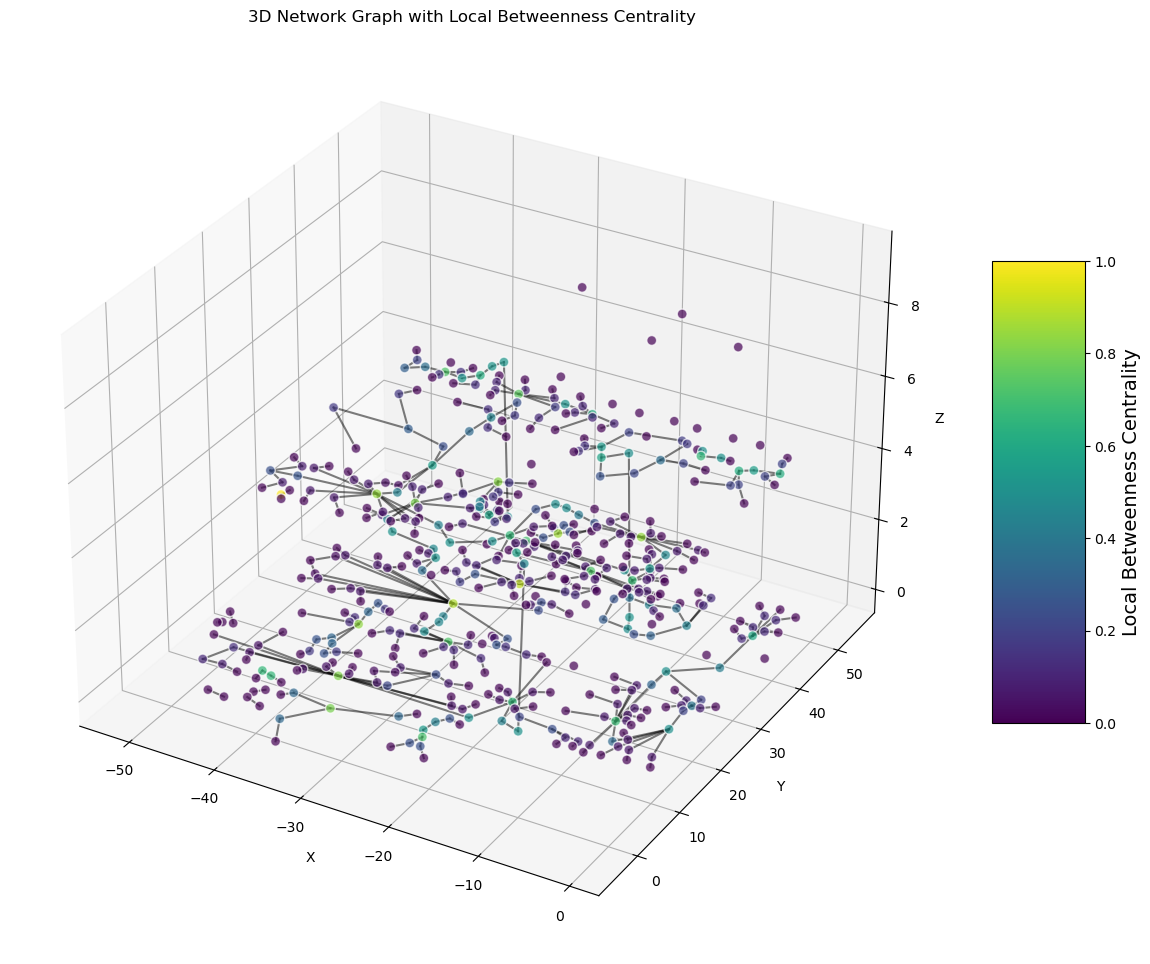

In [17]:
# Extract node positions and betweenness centrality
node_pos = np.array([data['coords'] for _, data in G.nodes(data=True)])
betweenness = np.array([data['betweenness_centrality'] for _, data in G.nodes(data=True)])

# Normalize node sizes based on betweenness centrality
node_sizes = 100 * (betweenness - min(betweenness)) / (max(betweenness) - min(betweenness) + 1e-6)

##below

# Define minimum and maximum node sizes
MIN_NODE_SIZE = 50
MAX_NODE_SIZE = 1000

# Normalize betweenness centrality to the range [0, 1]
betweenness_normalized = (betweenness - betweenness.min()) / (betweenness.max() - betweenness.min() + 1e-6)

# Compute node sizes
#node_sizes = MIN_NODE_SIZE + betweenness_normalized * (MAX_NODE_SIZE - MIN_NODE_SIZE)
node_sizes = 50
##above

# Normalize node colors based on betweenness centrality
cmap = cm.viridis
norm = plt.Normalize(vmin=min(betweenness), vmax=max(betweenness))
node_colors = cmap(norm(betweenness))

# Create 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
sc = ax.scatter(node_pos[:, 0], node_pos[:, 1], node_pos[:, 2],
                c=node_colors, s=node_sizes, edgecolors='w', alpha=0.7)

# Plot edges
for edge in G.edges():
    x = [G.nodes[edge[0]]['coords'][0], G.nodes[edge[1]]['coords'][0]]
    y = [G.nodes[edge[0]]['coords'][1], G.nodes[edge[1]]['coords'][1]]
    z = [G.nodes[edge[0]]['coords'][2], G.nodes[edge[1]]['coords'][2]]
    ax.plot(x, y, z, c='black', alpha=0.5)

#cmap = plt.get_cmap('RdBu')

# Add colorbar
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(betweenness)
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Local Betweenness Centrality',fontsize=14)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Network Graph with Local Betweenness Centrality')

plt.show()


### Visualizing Local Closeness Centrality

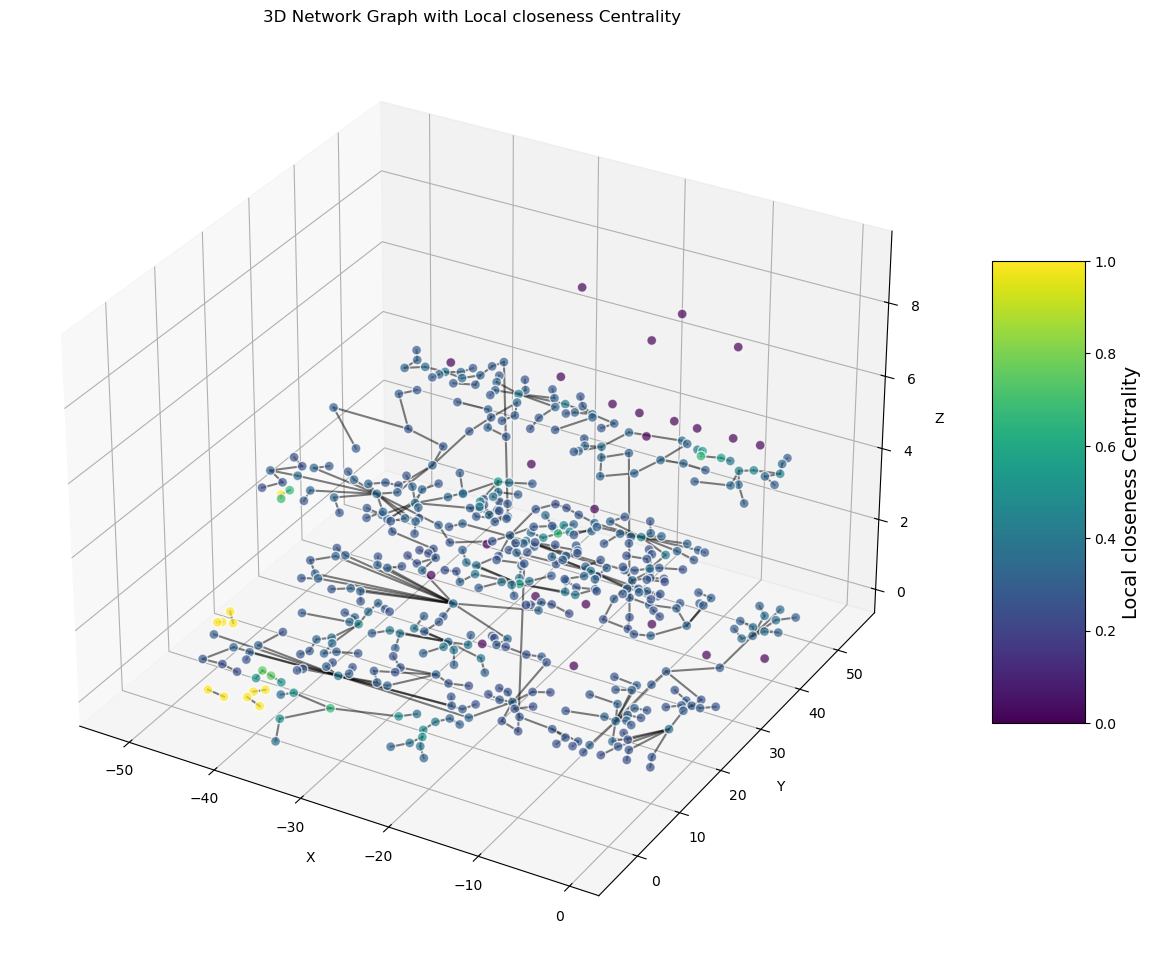

In [14]:
# Extract node positions and closeness centrality
node_pos = np.array([data['coords'] for _, data in G.nodes(data=True)])
closeness = np.array([data['closeness_centrality'] for _, data in G.nodes(data=True)])

# Normalize node sizes based on closeness centrality
node_sizes = 100 * (closeness - min(closeness)) / (max(closeness) - min(closeness) + 1e-6)

##below

# Define minimum and maximum node sizes
MIN_NODE_SIZE = 50
MAX_NODE_SIZE = 1000

# Normalize closeness centrality to the range [0, 1]
closeness_normalized = (closeness - closeness.min()) / (closeness.max() - closeness.min() + 1e-6)

# Compute node sizes
#node_sizes = MIN_NODE_SIZE + closeness_normalized * (MAX_NODE_SIZE - MIN_NODE_SIZE)
node_sizes = 50
##above

# Normalize node colors based on closeness centrality
cmap = cm.viridis
norm = plt.Normalize(vmin=min(closeness), vmax=max(closeness))
node_colors = cmap(norm(closeness))

# Create 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
sc = ax.scatter(node_pos[:, 0], node_pos[:, 1], node_pos[:, 2],
                c=node_colors, s=node_sizes, edgecolors='w', alpha=0.7)

# Plot edges
for edge in G.edges():
    x = [G.nodes[edge[0]]['coords'][0], G.nodes[edge[1]]['coords'][0]]
    y = [G.nodes[edge[0]]['coords'][1], G.nodes[edge[1]]['coords'][1]]
    z = [G.nodes[edge[0]]['coords'][2], G.nodes[edge[1]]['coords'][2]]
    ax.plot(x, y, z, c='black', alpha=0.5)

# Add colorbar
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(closeness)
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Local closeness Centrality',fontsize=14)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Network Graph with Local closeness Centrality')

plt.show()


### Visualizing Eigenvector Centrality

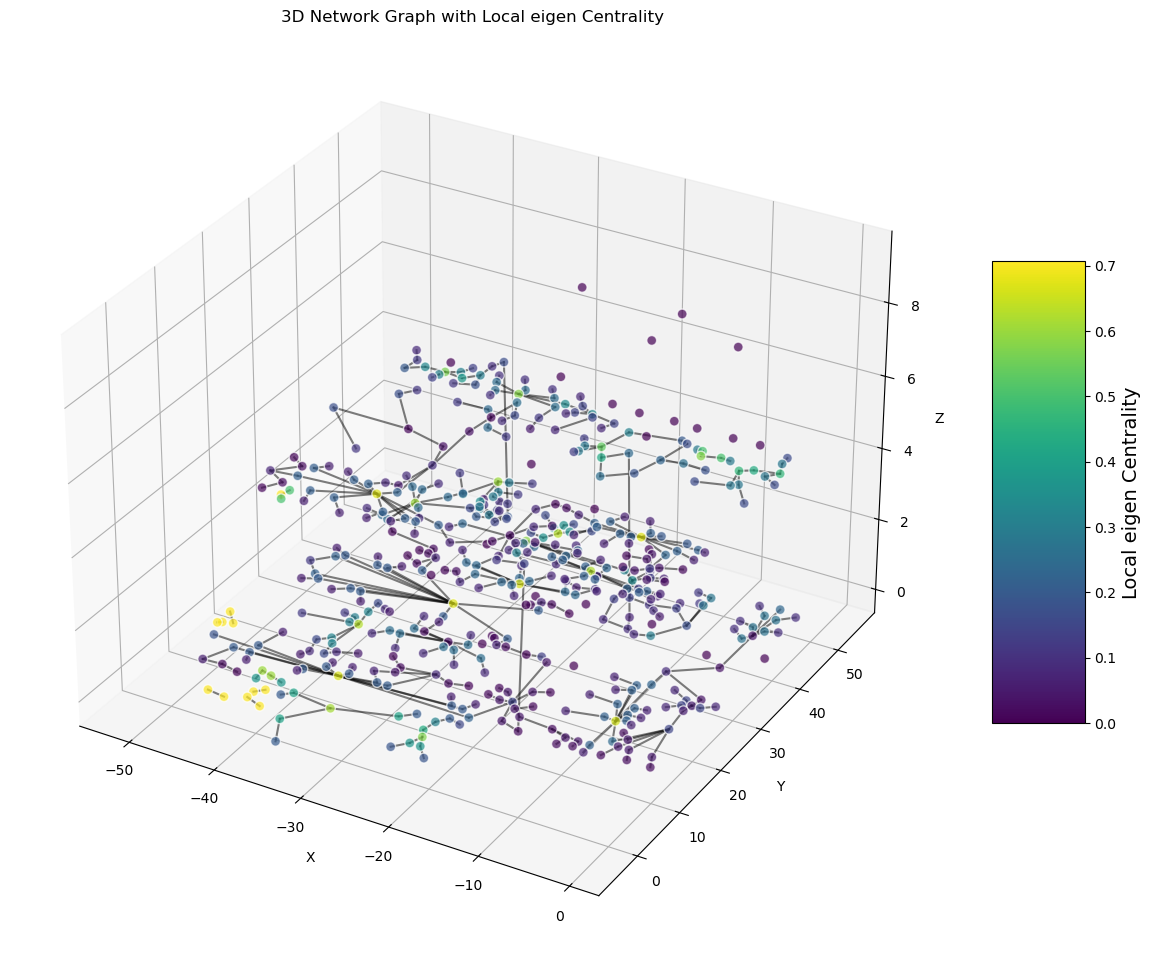

In [15]:
# Extract node positions and eigen centrality
node_pos = np.array([data['coords'] for _, data in G.nodes(data=True)])
eigen = np.array([data['eigenvector_centrality'] for _, data in G.nodes(data=True)])

# Normalize node sizes based on eigen centrality
node_sizes = 100 * (eigen - min(eigen)) / (max(eigen) - min(eigen) + 1e-6)

##below

# Define minimum and maximum node sizes
MIN_NODE_SIZE = 50
MAX_NODE_SIZE = 1000

# Normalize eigen centrality to the range [0, 1]
eigen_normalized = (eigen - eigen.min()) / (eigen.max() - eigen.min() + 1e-6)

# Compute node sizes
#node_sizes = MIN_NODE_SIZE + eigen_normalized * (MAX_NODE_SIZE - MIN_NODE_SIZE)
node_sizes = 50
##above

# Normalize node colors based on eigen centrality
cmap = cm.viridis
norm = plt.Normalize(vmin=min(eigen), vmax=max(eigen))
node_colors = cmap(norm(eigen))

# Create 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot nodes
sc = ax.scatter(node_pos[:, 0], node_pos[:, 1], node_pos[:, 2],
                c=node_colors, s=node_sizes, edgecolors='w', alpha=0.7)

# Plot edges
for edge in G.edges():
    x = [G.nodes[edge[0]]['coords'][0], G.nodes[edge[1]]['coords'][0]]
    y = [G.nodes[edge[0]]['coords'][1], G.nodes[edge[1]]['coords'][1]]
    z = [G.nodes[edge[0]]['coords'][2], G.nodes[edge[1]]['coords'][2]]
    ax.plot(x, y, z, c='black', alpha=0.5)

# Add colorbar
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(eigen)
cbar = plt.colorbar(mappable, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Local eigen Centrality',fontsize=14)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Network Graph with Local eigen Centrality')

plt.show()
